# <span style="color:green"> Data Findings -British Airline
  dataset from Forage https://www.theforage.com/simulations/british-airways/data-science-yqoz
### By Carolyne Kemunto Machuka 

In [7]:
#Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## Customer Booking csv Preview

In [8]:
# Load the data
df = pd.read_csv("customer_booking.csv", encoding="latin1")
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


##Preliminary check of data

In [9]:
#Preliminary check of data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [11]:
# Count duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Display duplicate rows if needed
df[df.duplicated()]


Number of duplicate rows: 719


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
196,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
316,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
384,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
456,1,Internet,RoundTrip,30,85,15,Fri,AKLKUL,Malaysia,1,0,0,8.83,1
513,3,Internet,RoundTrip,109,20,4,Tue,AKLKUL,Singapore,1,0,1,8.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49852,2,Internet,RoundTrip,204,6,14,Tue,PENTPE,Malaysia,1,0,0,4.67,0
49902,1,Mobile,RoundTrip,106,6,11,Fri,PENTPE,Taiwan,1,0,0,4.67,0
49934,1,Internet,RoundTrip,2,6,3,Thu,PENTPE,Malaysia,0,0,1,4.67,0
49944,1,Internet,RoundTrip,2,6,3,Thu,PENTPE,Malaysia,0,0,1,4.67,0


In [12]:
df.drop_duplicates(inplace=True,ignore_index=True) #drop duplicates
print(df.duplicated().sum()) # Count duplicate rows

0


In [13]:
# Encode categorical variables
categorical_cols = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col, encoder in label_encoders.items():
    df[col] = encoder.fit_transform(df[col])


## Encoding categorical variables

In [14]:
# Checking data types
df.dtypes
df.head(20)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0
5,1,0,2,3,48,20,4,0,61,1,0,1,5.52,0
6,3,0,2,201,33,6,4,0,61,1,0,1,5.52,0
7,2,0,2,238,19,14,1,0,36,1,0,1,5.52,0
8,1,0,2,80,22,4,1,0,61,0,0,1,5.52,0
9,1,1,2,378,30,12,3,0,36,0,0,0,5.52,0


In [15]:
# Define features and target
X = df.drop(columns=['booking_complete'])
y = df['booking_complete']

In [16]:
# Standardize numerical features
scaler = StandardScaler()
X[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']] = scaler.fit_transform(
    X[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']]
)


In [17]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Train RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [20]:
#Comparison

comparison_df = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
print(comparison_df.head())  # View first 5 rows



   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       0          0


## Evaluating the model

In [21]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n", report)

Model Accuracy: 0.8519

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      8378
           1       0.53      0.10      0.17      1479

    accuracy                           0.85      9857
   macro avg       0.70      0.54      0.55      9857
weighted avg       0.81      0.85      0.81      9857



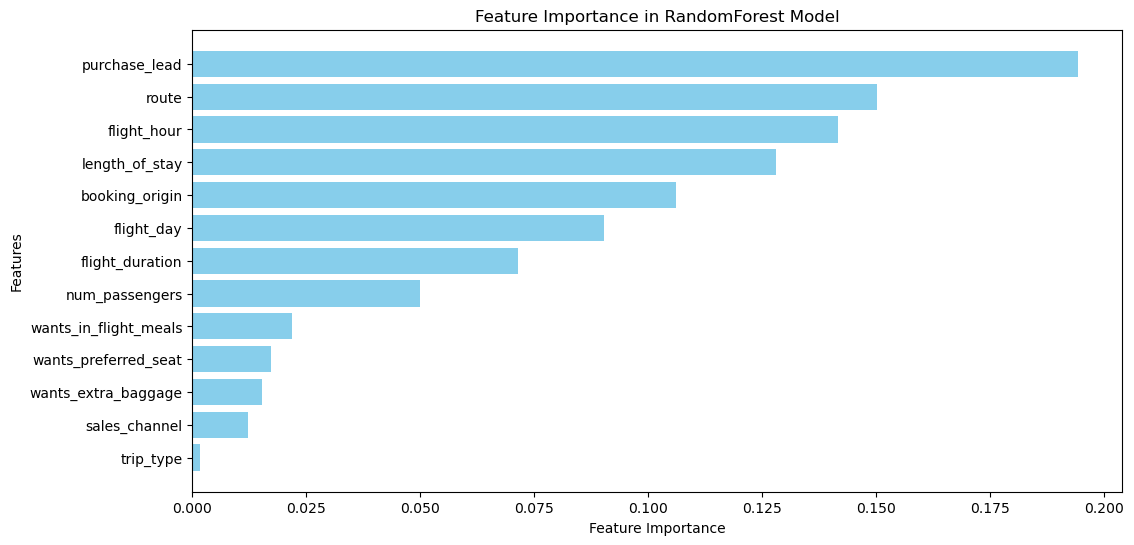

In [22]:
# Feature importance visualization
feature_importances = rf_model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.barh(feature_names[sorted_indices], feature_importances[sorted_indices], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in RandomForest Model")
plt.gca().invert_yaxis()
plt.show()


#### The feature importance plot shows which variables had the most impact on predicting bookings. The most influential features appear to be:

Purchase lead (how early the booking was made)

Route (travel path)

Flight hour

Length of stay



In [ ]:
!jupyter nbconvert "Predictive Analytics_Customer Booking_Slide.ipynb" --to slides --post serve --no-input --no-prompt